# Enterprise Sprint 3

## Tratamento de dados

Criando dataframe e familiarizando com os dados

In [ ]:
import pandas as pd
import numpy as np

dados = pd.read_excel('Base_Final_Consolidada_Sprint3.xlsx')

dados.head()

,Município,Safra,Área Plantada (ha),Área Colhida (ha),Produção (ton),Rendimento Médio (kg/ha),NDVI_médio_safra,Precipitacao_total_mm,Temp_max_media,Temp_min_media,Umidade_media,Dias_com_chuva_20mm,Dias_sem_chuva_1mm
0,Campo Novo do Parecis,2019,380000,380000,1276800,3360,0.6026,797.0,28.380392,21.079739,84.954248,6,45
1,Campo Novo do Parecis,2020,389000,389000,1377060,3540,0.6218,992.0,28.302210,20.685635,82.292818,5,52
2,Campo Novo do Parecis,2021,371711,371711,1304958,3511,0.6242,1159.6,28.160773,20.472376,84.303867,8,46
3,Campo Novo do Parecis,2022,387800,387800,1396080,3600,0.6573,1121.6,27.998895,20.056354,82.618785,14,52
4,Campo Novo do Parecis,2023,407800,407800,1571355,3853,0.6605,143.1,30.002439,20.585366,84.339024,1,21


In [ ]:
dados.dtypes

,0
Município,object
Safra,int64
Área Plantada (ha),int64
Área Colhida (ha),int64
Produção (ton),int64
Rendimento Médio (kg/ha),int64
NDVI_médio_safra,float64
Precipitacao_total_mm,float64
Temp_max_media,float64
Temp_min_media,float64


In [ ]:
dados.isnull().sum()

,0
Município,0
Safra,0
Área Plantada (ha),0
Área Colhida (ha),0
Produção (ton),0
Rendimento Médio (kg/ha),0
NDVI_médio_safra,0
Precipitacao_total_mm,0
Temp_max_media,0
Temp_min_media,0


## Análise estatística e correlação

In [ ]:
# Importar bibliotecas necessárias
from scipy.stats import pearsonr, spearmanr

# Selecionar apenas colunas numéricas relevantes
variaveis = [
    'NDVI_médio_safra',
    'Rendimento Médio (kg/ha)',
    'Precipitacao_total_mm',
    'Temp_max_media',
    'Temp_min_media',
    'Umidade_media',
    'Dias_com_chuva_20mm',
    'Dias_sem_chuva_1mm'
]

# Calcular correlação de Pearson e Spearman
correlacoes = []

for var1 in variaveis:
    for var2 in variaveis:
        if var1 != var2:
            pearson, _ = pearsonr(dados[var1], dados[var2])
            spearman, _ = spearmanr(dados[var1], dados[var2])
            correlacoes.append({
                'Variável 1': var1,
                'Variável 2': var2,
                'Pearson': round(pearson, 4),
                'Spearman': round(spearman, 4)
            })

# Exibir resultados em DataFrame
df_corr = pd.DataFrame(correlacoes)
df_corr = df_corr[df_corr['Variável 1'] < df_corr['Variável 2']]
df_corr


,Variável 1,Variável 2,Pearson,Spearman
0,NDVI_médio_safra,Rendimento Médio (kg/ha),0.1663,0.1259
1,NDVI_médio_safra,Precipitacao_total_mm,0.2671,0.3950
2,NDVI_médio_safra,Temp_max_media,0.5885,0.6416
3,NDVI_médio_safra,Temp_min_media,0.4907,0.6023
4,NDVI_médio_safra,Umidade_media,-0.4743,-0.3557
9,Rendimento Médio (kg/ha),Temp_max_media,0.5508,0.4555
10,Rendimento Médio (kg/ha),Temp_min_media,0.0349,0.0486
11,Rendimento Médio (kg/ha),Umidade_media,-0.5443,-0.4122
15,Precipitacao_total_mm,Rendimento Médio (kg/ha),-0.0923,0.1998
16,Precipitacao_total_mm,Temp_max_media,0.1618,0.1127


A correlação entre o NDVI médio da safra e a produtividade foi fraca (Pearson = 0,1663), indicando que o NDVI isolado não é um bom preditor direto da produtividade agrícola.
Por outro lado, o NDVI apresentou correlação moderada com a temperatura máxima (Pearson = 0,5885) e correlação negativa com a umidade (Pearson = -0,4743), o que sugere que ele está mais associado às condições climáticas do que diretamente ao rendimento.
A produtividade também apresentou correlação moderada com a temperatura e negativa com a umidade, reforçando a importância desses fatores no resultado final da safra.

## Regressão Linear

In [ ]:
# Definir variáveis independentes para a regressão
variaveis = [
    'NDVI_médio_safra',
    'Precipitacao_total_mm',
    'Temp_max_media',
    'Temp_min_media',
    'Umidade_media'
]

# Rodar regressão linear simples para cada variável
from sklearn.linear_model import LinearRegression

resultados = []

for var in variaveis:
    X = dados[[var]]
    y = dados['Rendimento Médio (kg/ha)']

    modelo = LinearRegression()
    modelo.fit(X, y)

    coef = modelo.coef_[0]
    intercepto = modelo.intercept_
    r2 = modelo.score(X, y)

    resultados.append({
        'Variável': var,
        'Coeficiente': round(coef, 2),
        'Intercepto': round(intercepto, 2),
        'R²': round(r2, 4)
    })

# Criar DataFrame com os resultados
df_regressao = pd.DataFrame(resultados)
df_regressao

,Variável,Coeficiente,Intercepto,R²
0,NDVI_médio_safra,898.10,2945.49,0.0276
1,Precipitacao_total_mm,-0.06,3608.59,0.0085
2,Temp_max_media,102.88,529.07,0.3033
3,Temp_min_media,10.12,3328.35,0.0012
4,Umidade_media,-61.18,8618.15,0.2963


Foram testadas regressões lineares simples entre produtividade e cinco variáveis independentes (NDVI e clima). Os melhores resultados foram obtidos com temperatura máxima (R² = 0,3033) e umidade média (R² = 0,2963), que apresentaram relação moderada com a produtividade.
Por outro lado, o NDVI e a precipitação apresentaram valores de R² muito baixos, indicando baixo poder preditivo isolado.
Isso reforça a ideia de que a produtividade agrícola depende de múltiplos fatores combinados, e não apenas de um único indicador.

## Gráficos

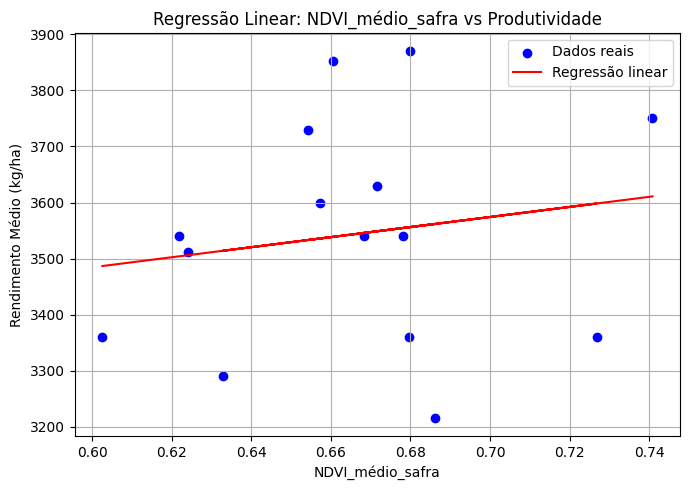

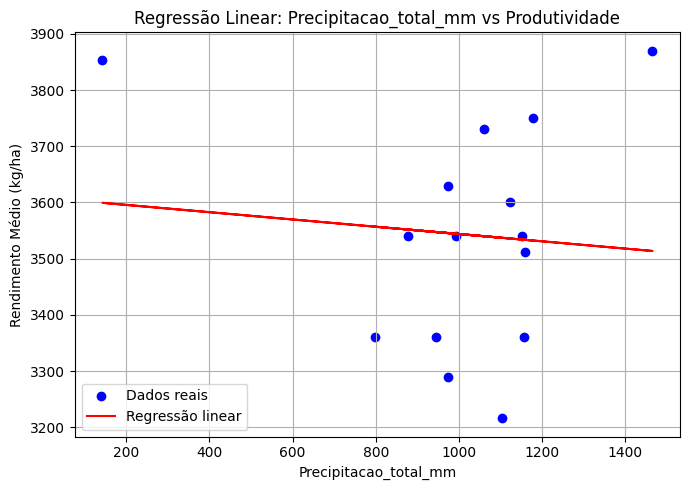

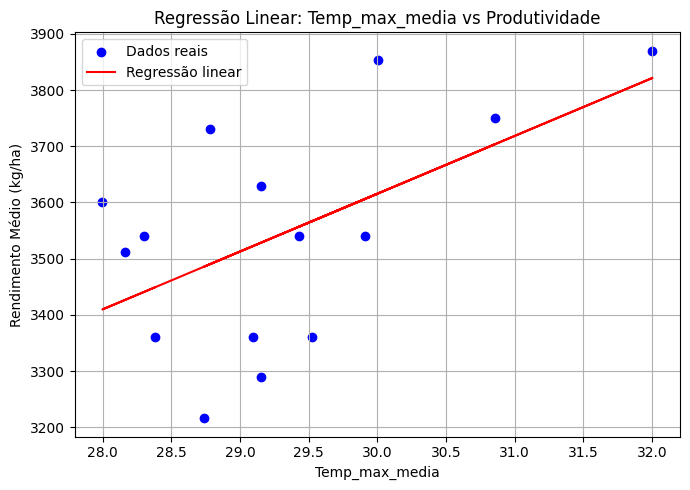

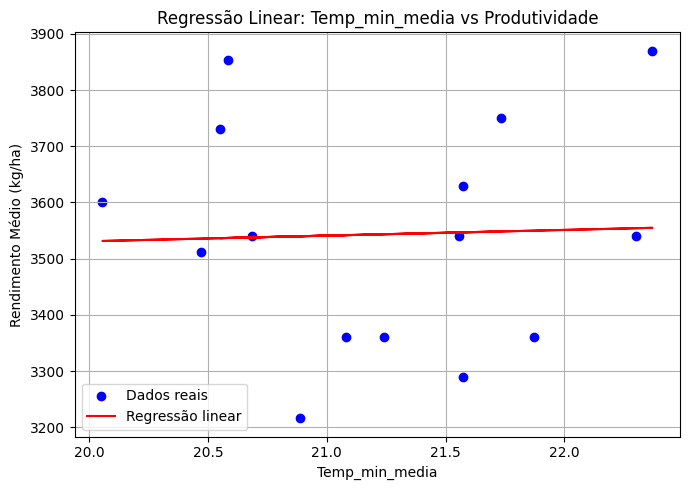

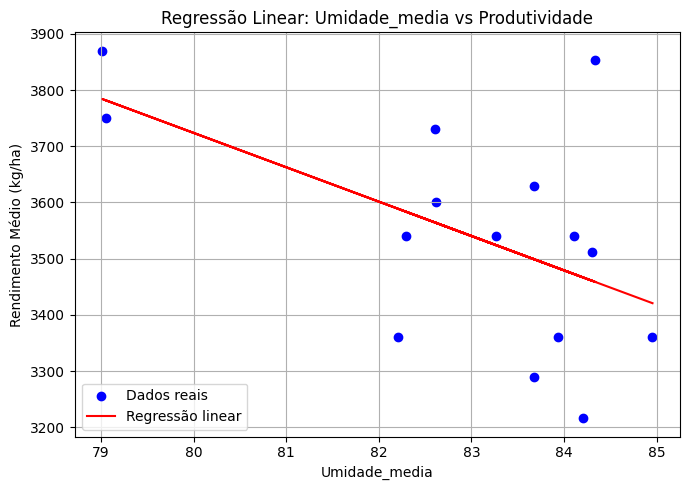

In [ ]:
import matplotlib.pyplot as plt
variaveis = [
    'NDVI_médio_safra',
    'Precipitacao_total_mm',
    'Temp_max_media',
    'Temp_min_media',
    'Umidade_media'
]

for var in variaveis:
    X = dados[[var]]
    y = dados['Rendimento Médio (kg/ha)']

    modelo = LinearRegression()
    modelo.fit(X, y)

    # Predição
    y_pred = modelo.predict(X)

    # Gráfico
    plt.figure(figsize=(7, 5))
    plt.scatter(X, y, color='blue', label='Dados reais')
    plt.plot(X, y_pred, color='red', label='Regressão linear')
    plt.title(f'Regressão Linear: {var} vs Produtividade')
    plt.xlabel(var)
    plt.ylabel('Rendimento Médio (kg/ha)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Discussão dos Resultados e Análise Crítica

### 📊 Análise Estatística – Correlação

As análises de correlação de Pearson e Spearman demonstraram que a variável **NDVI médio da safra** apresenta **correlação fraca com a produtividade agrícola** (Pearson = 0,1663). Isso indica que, isoladamente, o NDVI **não é um bom preditor da produtividade** na base analisada.

Por outro lado, o NDVI mostrou correlação **moderada com a temperatura máxima (Pearson = 0,5885)** e **negativa com a umidade relativa (Pearson = -0,4743)**. Isso sugere que o NDVI pode refletir com mais clareza as condições climáticas da vegetação do que propriamente os rendimentos.

A produtividade apresentou correlação **negativa com a umidade (Pearson = -0,5443)** e **moderada com a temperatura máxima (Pearson = 0,5508)**, reforçando a ideia de que condições climáticas impactam significativamente a produção agrícola.

---

### 📉 Análise de Regressão Linear Simples

Regressões lineares simples foram aplicadas com diferentes variáveis independentes, buscando estimar a produtividade agrícola. Os principais resultados foram:

- **NDVI médio da safra**  
  - R² = 0,0276  
  - Baixo poder explicativo.

- **Precipitação total (mm)**  
  - R² = 0,0085  
  - Relação praticamente inexistente.

- **Temperatura máxima (°C)**  
  - R² = 0,3033  
  - Melhor desempenho individual entre as variáveis.

- **Umidade média (%)**  
  - R² = 0,2963  
  - Relação moderada e negativa.

- **Temperatura mínima (°C)**  
  - R² = 0,0012  
  - Não apresentou relevância.

Com isso, observa-se que **nenhuma variável isoladamente explica bem a produtividade**, embora temperatura e umidade tenham apresentado **relações mais consistentes**.

---

### ⚠️ Limitações da Análise

- A base de dados possui **apenas 15 registros** agregados por município e safra, o que limita a robustez estatística.
- Os dados representam médias por safra, ou seja, **não há granularidade por talhão, fazenda ou mês**.
- Não foram considerados outros fatores como **tipo de solo, técnicas de manejo, pragas, irrigação ou aplicação de insumos**, que poderiam influenciar fortemente os resultados.

---

### 💡 Sugestões de Melhoria

- **Ampliar o número de safras** e incluir mais municípios e culturas.
- Incluir **variáveis agronômicas e operacionais** (fertilização, sementes, práticas de manejo).
- Aplicar modelos preditivos mais robustos, como **regressão múltipla** ou **algoritmos de machine learning multivariado**.
- Analisar o NDVI em diferentes momentos da safra (ex: vegetativo, floração) para melhor alinhamento com o rendimento.

---

### ✅ Conclusão

Embora o NDVI seja um importante indicador vegetativo, sua **aplicação isolada para predição de produtividade não foi eficaz** nesta base. As variáveis climáticas apresentaram maior influência, mas ainda insuficientes para uma predição confiável. Para aplicações práticas, será necessário **integrar mais variáveis e ampliar a base de dados**.

